상위 5개 역
       역명   이동성지수
1      신답  2.1250
2  성신여대입구  2.0375
3    동대입구  2.0125
4      신길  2.0000
5     경복궁  1.9750

하위 5개 역
      역명  이동성지수
1     방화    1.0
2     방이    1.0
3     반포    1.0
4     미사    1.0
5  효창공원앞    1.0


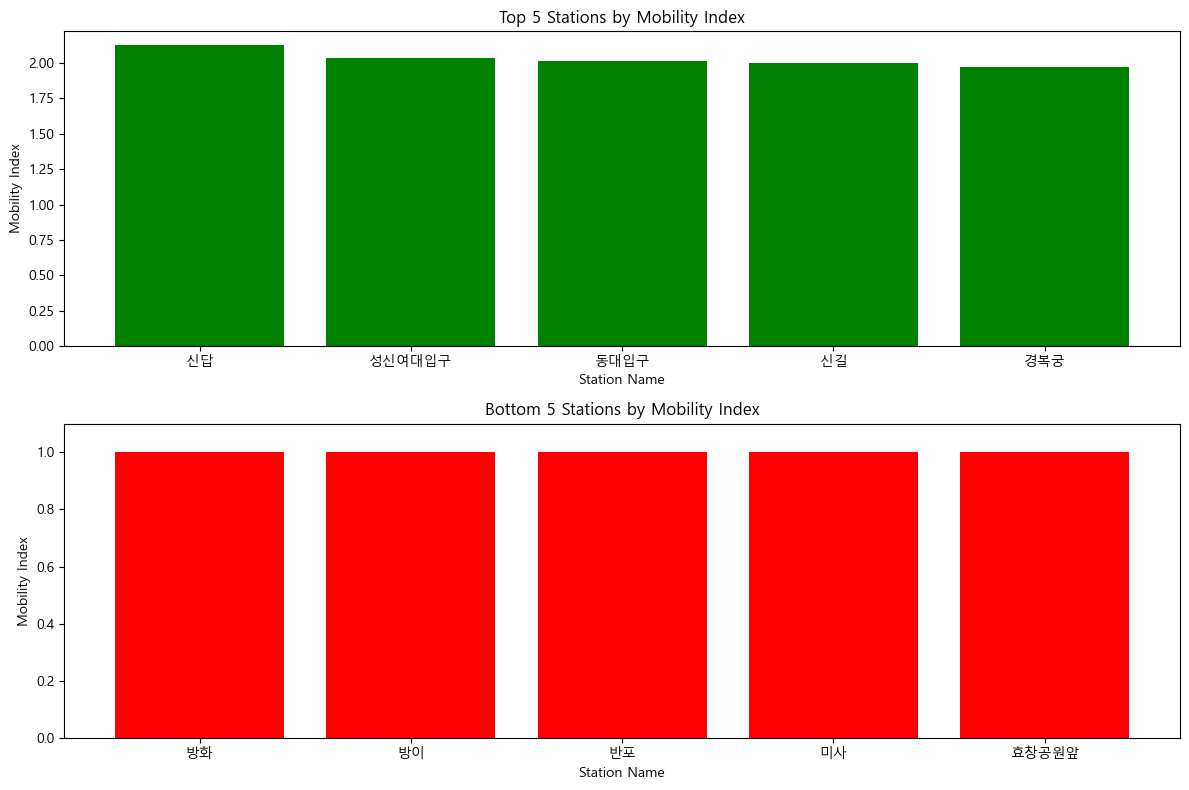

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 한글 폰트 설정 (Windows 시스템의 Malgun Gothic 사용)
font_path = 'C:/Windows/Fonts/malgun.ttf'  # Malgun Gothic 폰트 경로
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# CSV 파일 읽기
file_path = 'subway_interval.csv'
df = pd.read_csv(file_path, encoding='euc-kr')

# 연단간격 점수를 합치고 역명 개수로 나누기 (이동성지수 계산)
mobility_index = df.groupby('역명')['연단간격'].mean().reset_index()
mobility_index.columns = ['역명', '이동성지수']

# 이동성지수를 기준으로 정렬
sorted_mobility_index = mobility_index.sort_values(by='이동성지수', ascending=False)

# 상위 5개 역과 하위 5개 역 추출
top_5 = sorted_mobility_index.head(5)[['역명', '이동성지수']].reset_index(drop=True)
bottom_5 = sorted_mobility_index.tail(5)[['역명', '이동성지수']].reset_index(drop=True)

# 인덱스를 1부터 시작하도록 설정
top_5.index = top_5.index + 1
bottom_5.index = bottom_5.index + 1

# 상위 5개 역과 하위 5개 역 출력
print("상위 5개 역")
print(top_5)

print("\n하위 5개 역")
print(bottom_5)

# 결과를 하나의 데이터프레임으로 결합
top_bottom = pd.concat([top_5, bottom_5])

# 결과를 CSV 파일로 저장
output_file_path = 'top_bottom_stations.csv'
top_bottom.to_csv(output_file_path, index=True, encoding='utf-8-sig')

# 도표로 나타내기
plt.figure(figsize=(12, 8))

# 상위 5개 역
plt.subplot(2, 1, 1)
plt.bar(top_5['역명'], top_5['이동성지수'], color='green')
plt.title('Top 5 Stations by Mobility Index')
plt.xlabel('Station Name')
plt.ylabel('Mobility Index')
plt.ylim(0, top_5['이동성지수'].max() + 0.1)

# 하위 5개 역
plt.subplot(2, 1, 2)
plt.bar(bottom_5['역명'], bottom_5['이동성지수'], color='red')
plt.title('Bottom 5 Stations by Mobility Index')
plt.xlabel('Station Name')
plt.ylabel('Mobility Index')
plt.ylim(0, bottom_5['이동성지수'].max() + 0.1)

plt.tight_layout()
plt.show()

#구 안에 속해있는 역들을 리스트로 받아서, 해당 구의 위치 색깔? 로 표현하기

In [3]:
import pandas as pd
import folium
import json
#원본 데이터 최대한 유지
# CSV 파일 읽기
file_path = 'wheelchair_Chargers.csv'
df = pd.read_csv(file_path, encoding='euc-kr')

# GeoJSON 파일 읽기
geo_json_path = 'seoul_municipalities_geo.json'
with open(geo_json_path, encoding='utf-8') as f:
    geo_json = json.load(f)

# 각 구별로 충전소 수 계산
gu_counts = df['구'].value_counts().reset_index()
gu_counts.columns = ['구', 'count']

# 서울 지도 생성
seoul_map = folium.Map(location=[37.5665, 126.9780], zoom_start=11)

# 구별로 색상 설정을 위한 데이터 준비
choropleth_data = gu_counts.set_index('구')['count'].to_dict()

# Choropleth 레이어 추가
folium.Choropleth(
    geo_data=geo_json,
    data=choropleth_data,
    columns=['구', 'count'],
    key_on='feature.properties.SIG_KOR_NM',
    fill_color='Blues',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Number of Charging Stations'
).add_to(seoul_map)

# 충전소 위치를 점으로 표시
for _, row in df.iterrows():
    folium.CircleMarker(
        location=[row['위도'], row['경도']],
        radius=5,
        color='blue',
        fill=True,
        fill_color='blue'
    ).add_to(seoul_map)
#데이터 구와 지역 구의 불일치성 = 검은색
# 지도 저장
seoul_map.save('seoul_wheelchair_chargers.html')
#개수 1개 ,  비율 1개
#***************html 파일로 생성됨*********************